In [6]:
using Calculus
using Plots

# Parameters
K0 = 1; A0 = 1; L0 = 1; T = 500
a = 0.66; s = 0.3; d = 0; n = 0.00; g = 0.02; 

# Functions
CobbDouglas(K, AL, alpha, beta = 1-alpha) = K^alpha * AL^beta
Production(K, A, L) = CobbDouglas(K, A*L, a)
CapitalChange(K,Inv, delta) = (1-d)*K + Inv
Investment(Y, s) = s * Y
LabourChange(L, n) = (1+n)*L
TechnologyChange(A, g) = (1+g)*A

function SolveFirmsProblem(ProductionFunction, K, A, L)
    production_function_gradient = Calculus.gradient(x -> ProductionFunction(x[1], x[2], x[3]), [K, A, L])
    W = production_function_gradient[3]  # W = dF/dL
    Rk = production_function_gradient[1] # Rk = dF/dK
    W, Rk
end

function Solow(K0, A0, L0, s, n, g, d, T)
    Y0 = Production(K0, A0, L0)
    Inv0 = Investment(Y0, s)
    C0 = Y0 - Inv0 
    W0, Rk0 = SolveFirmsProblem(Production, K0, A0, L0)
    
    # Initializing sequences of allocations and prices for times t=1..T
    for x = [:C, :Y, :K, :Inv, :Rk, :W, :A, :L]
        @eval $x = zeros(T)
    end
    
    t = 1
    K[t] = CapitalChange(K0, Inv0, d)
    A[t] = TechnologyChange(A0, g)
    L[t] = LabourChange(L0, n)
    Y[t] = Production(K[t], A[t], L[t])
    Inv[t] = Investment(Y[t], s)
    C[t] = Y[t] - Inv[t] 
    W[t], Rk[t] = SolveFirmsProblem(Production, K[t], A[t], L[t])
    
    for t = 2:T
        K[t] = CapitalChange(K[t-1], Inv[t-1], d)
        A[t] = TechnologyChange(A[t-1], g)
        L[t] = LabourChange(L[t-1], n)
        Y[t] = Production(K[t], A[t], L[t])
        Inv[t] = Investment(Y[t], s)
        C[t] = Y[t] - Inv[t]
        W[t], Rk[t] = SolveFirmsProblem(Production, K[t], A[t], L[t])
    end
    
    C, Y, K, Inv, Rk, W, A, L
end

C, Y, K, Inv, Rk, W, A, L = Solow(K0, A0, L0, s, n, g, d, T);


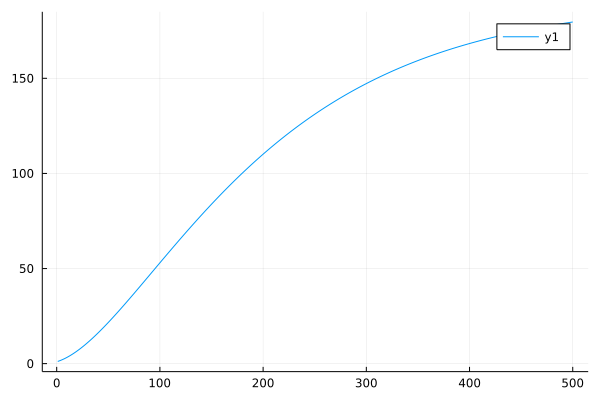

In [7]:
plot(Y./(A.*L))

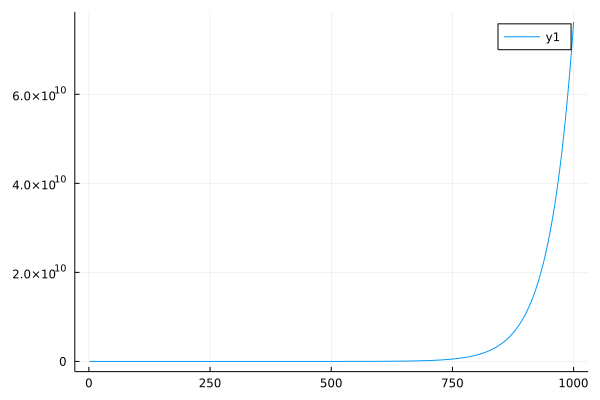

In [5]:
plot(Y./L)